In [13]:
%load_ext lab_black
from sklearn import preprocessing
import warnings

warnings.filterwarnings("ignore")
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [14]:
data = pd.read_csv("../data/AB_NYC_2019.csv")
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
# Replacing the missing values for numerical columns with mean
data["number_of_reviews"] = data["number_of_reviews"].fillna(
    data["number_of_reviews"].mean()
)
data["price"] = data["price"].fillna(data["price"].mean())
data["minimum_nights"] = data["minimum_nights"].fillna(data["minimum_nights"].mean())
data["reviews_per_month"] = data["reviews_per_month"].fillna(
    data["reviews_per_month"].mean()
)
data["calculated_host_listings_count"] = data["calculated_host_listings_count"].fillna(
    data["calculated_host_listings_count"].mean()
)
data["availability_365"] = data["availability_365"].fillna(
    data["availability_365"].mean()
)
data["last_review"] = data["last_review"].fillna(12 / 18 / 2022)
data["name"] = data["name"].fillna(data["name"].mode()[0])
data["neighbourhood_group"] = data["neighbourhood_group"].fillna(
    data["neighbourhood_group"].mode()[0]
)
data["host_name"] = data["host_name"].fillna(data["host_name"].mode()[0])

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

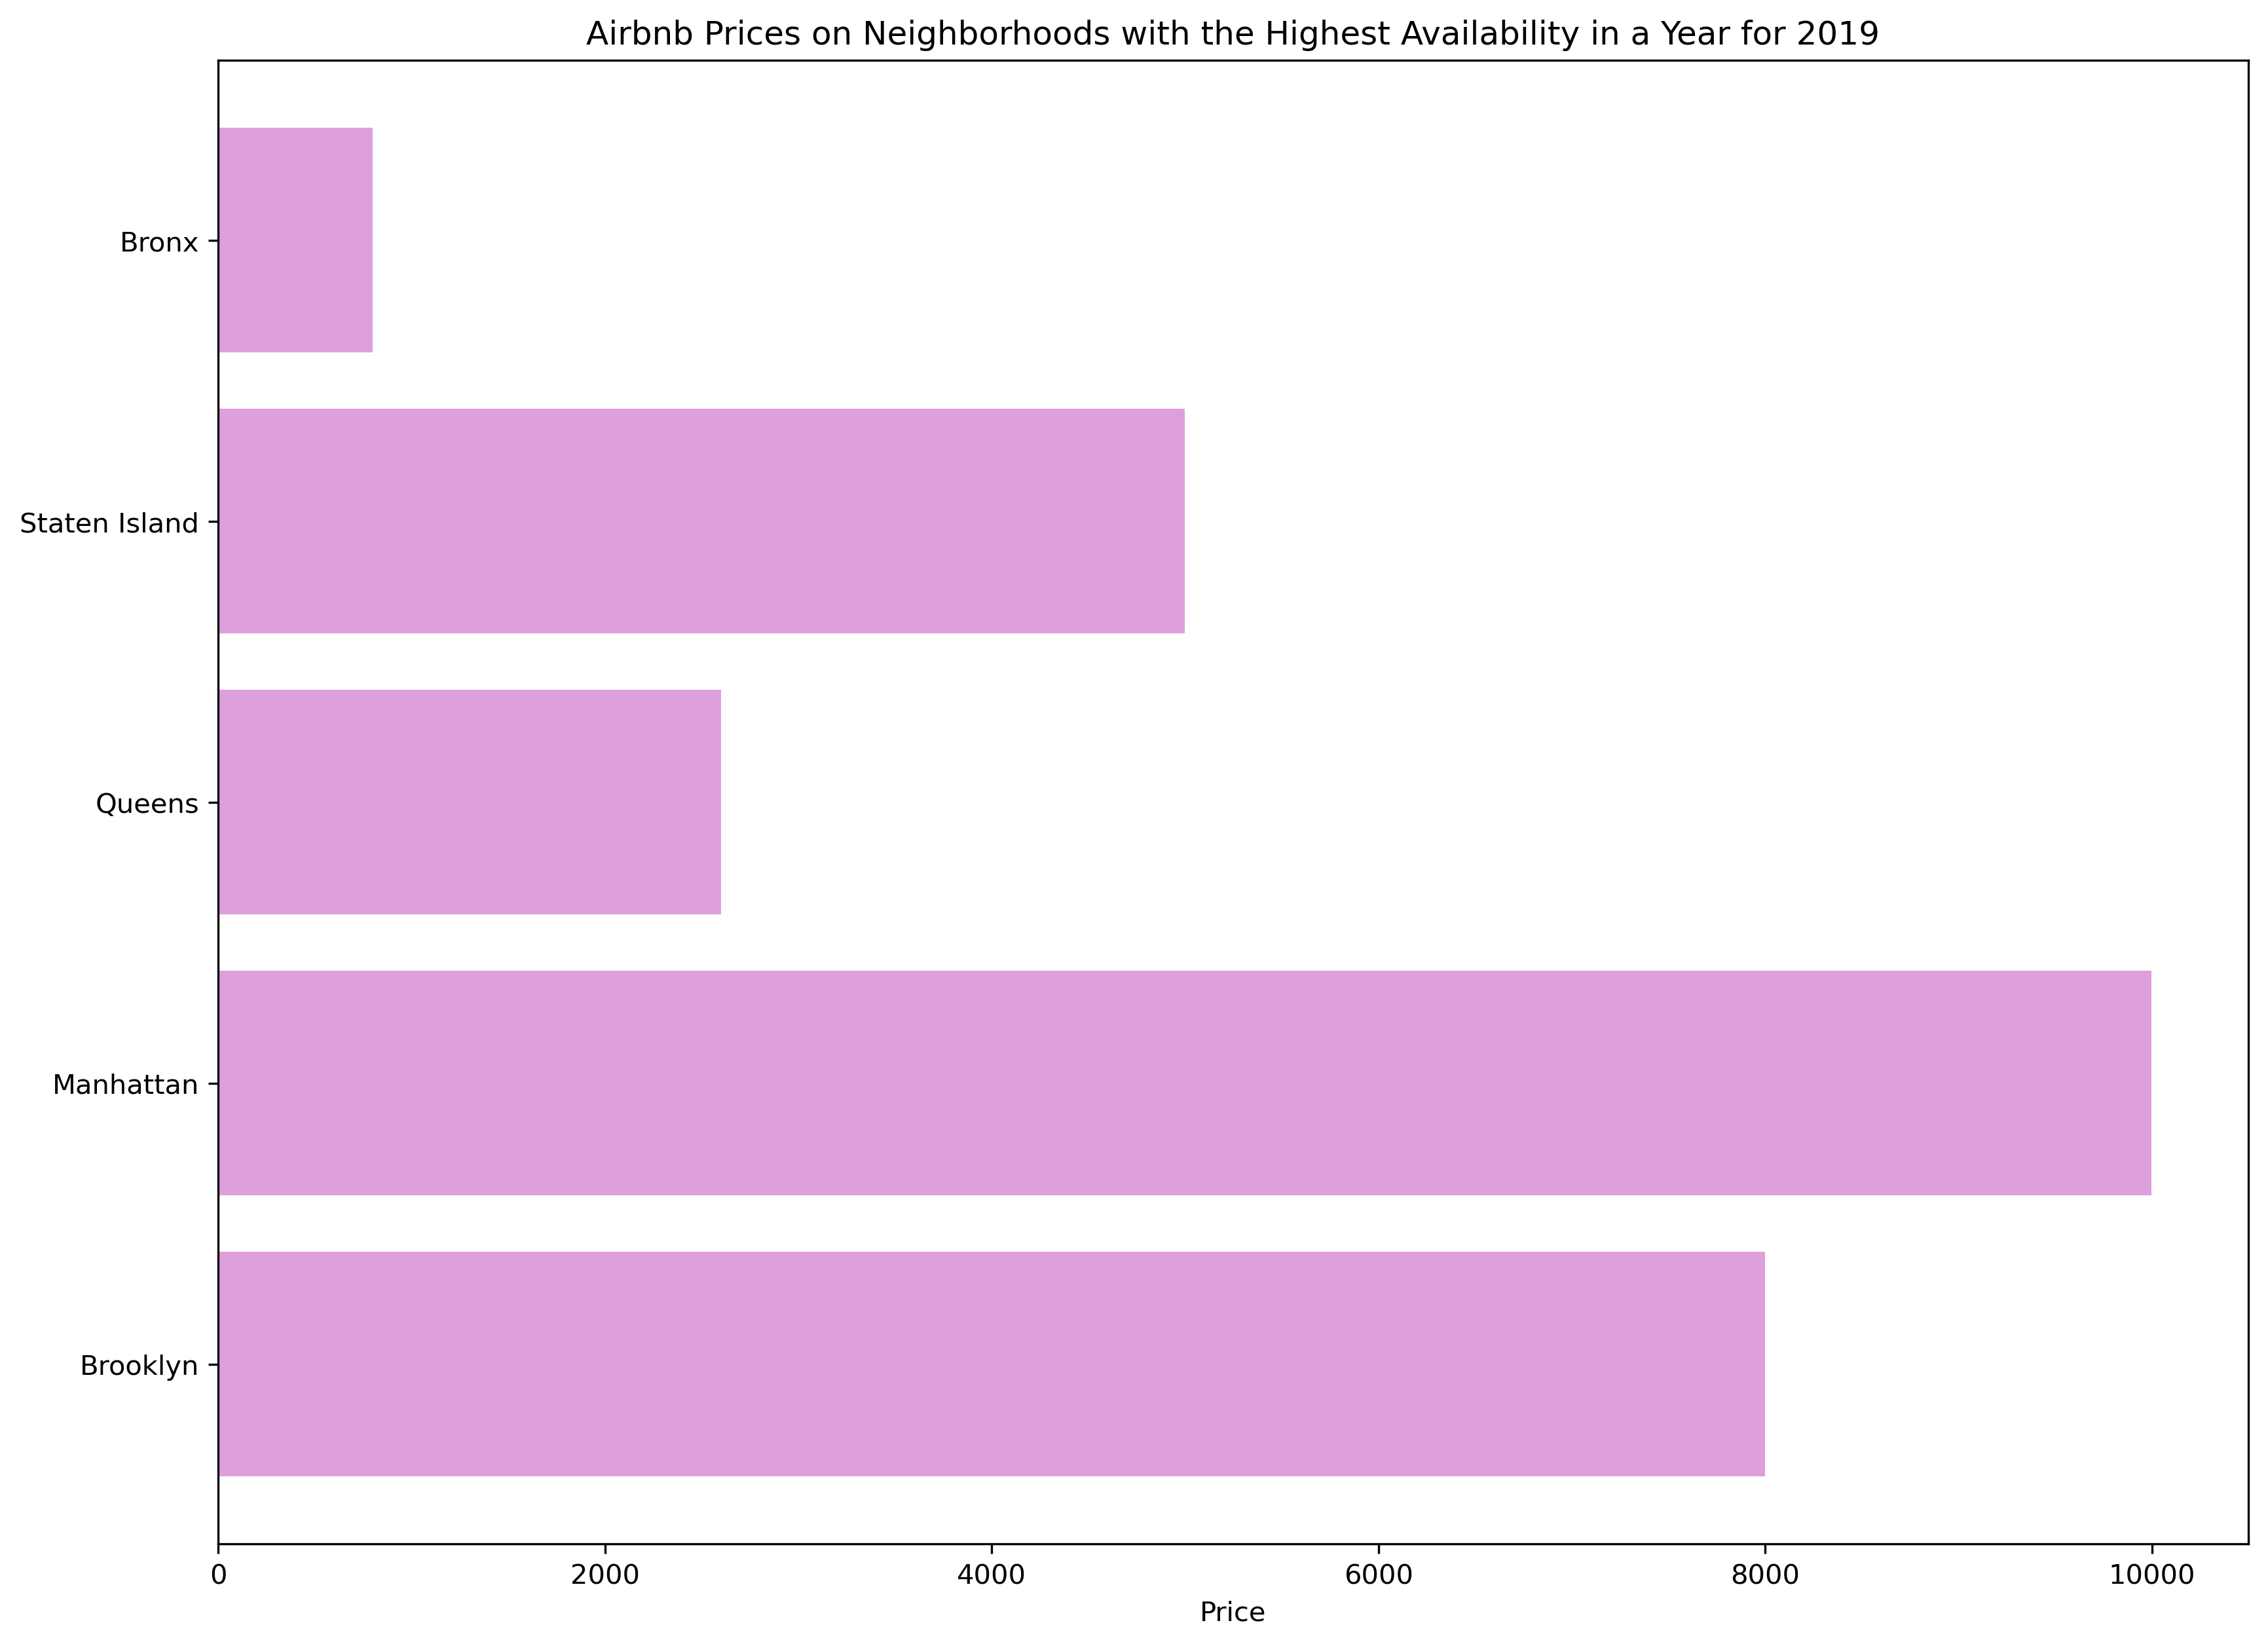

In [16]:
# Bar plor for Airbnb prices based on neighbourhoods with the highest availability in a year
figure_1 = plt.figure(figsize=(20 / 1.5, 15 / 1.5), dpi=300)
Highest_availability = data[data["availability_365"] >= 250]
plt.barh(
    Highest_availability["neighbourhood_group"],
    Highest_availability["price"],
    color="plum",
)
plt.title(
    "Airbnb Prices on Neighborhoods with the Highest Availability in a Year for 2019"
)
plt.xlabel("Price")
plt.show()

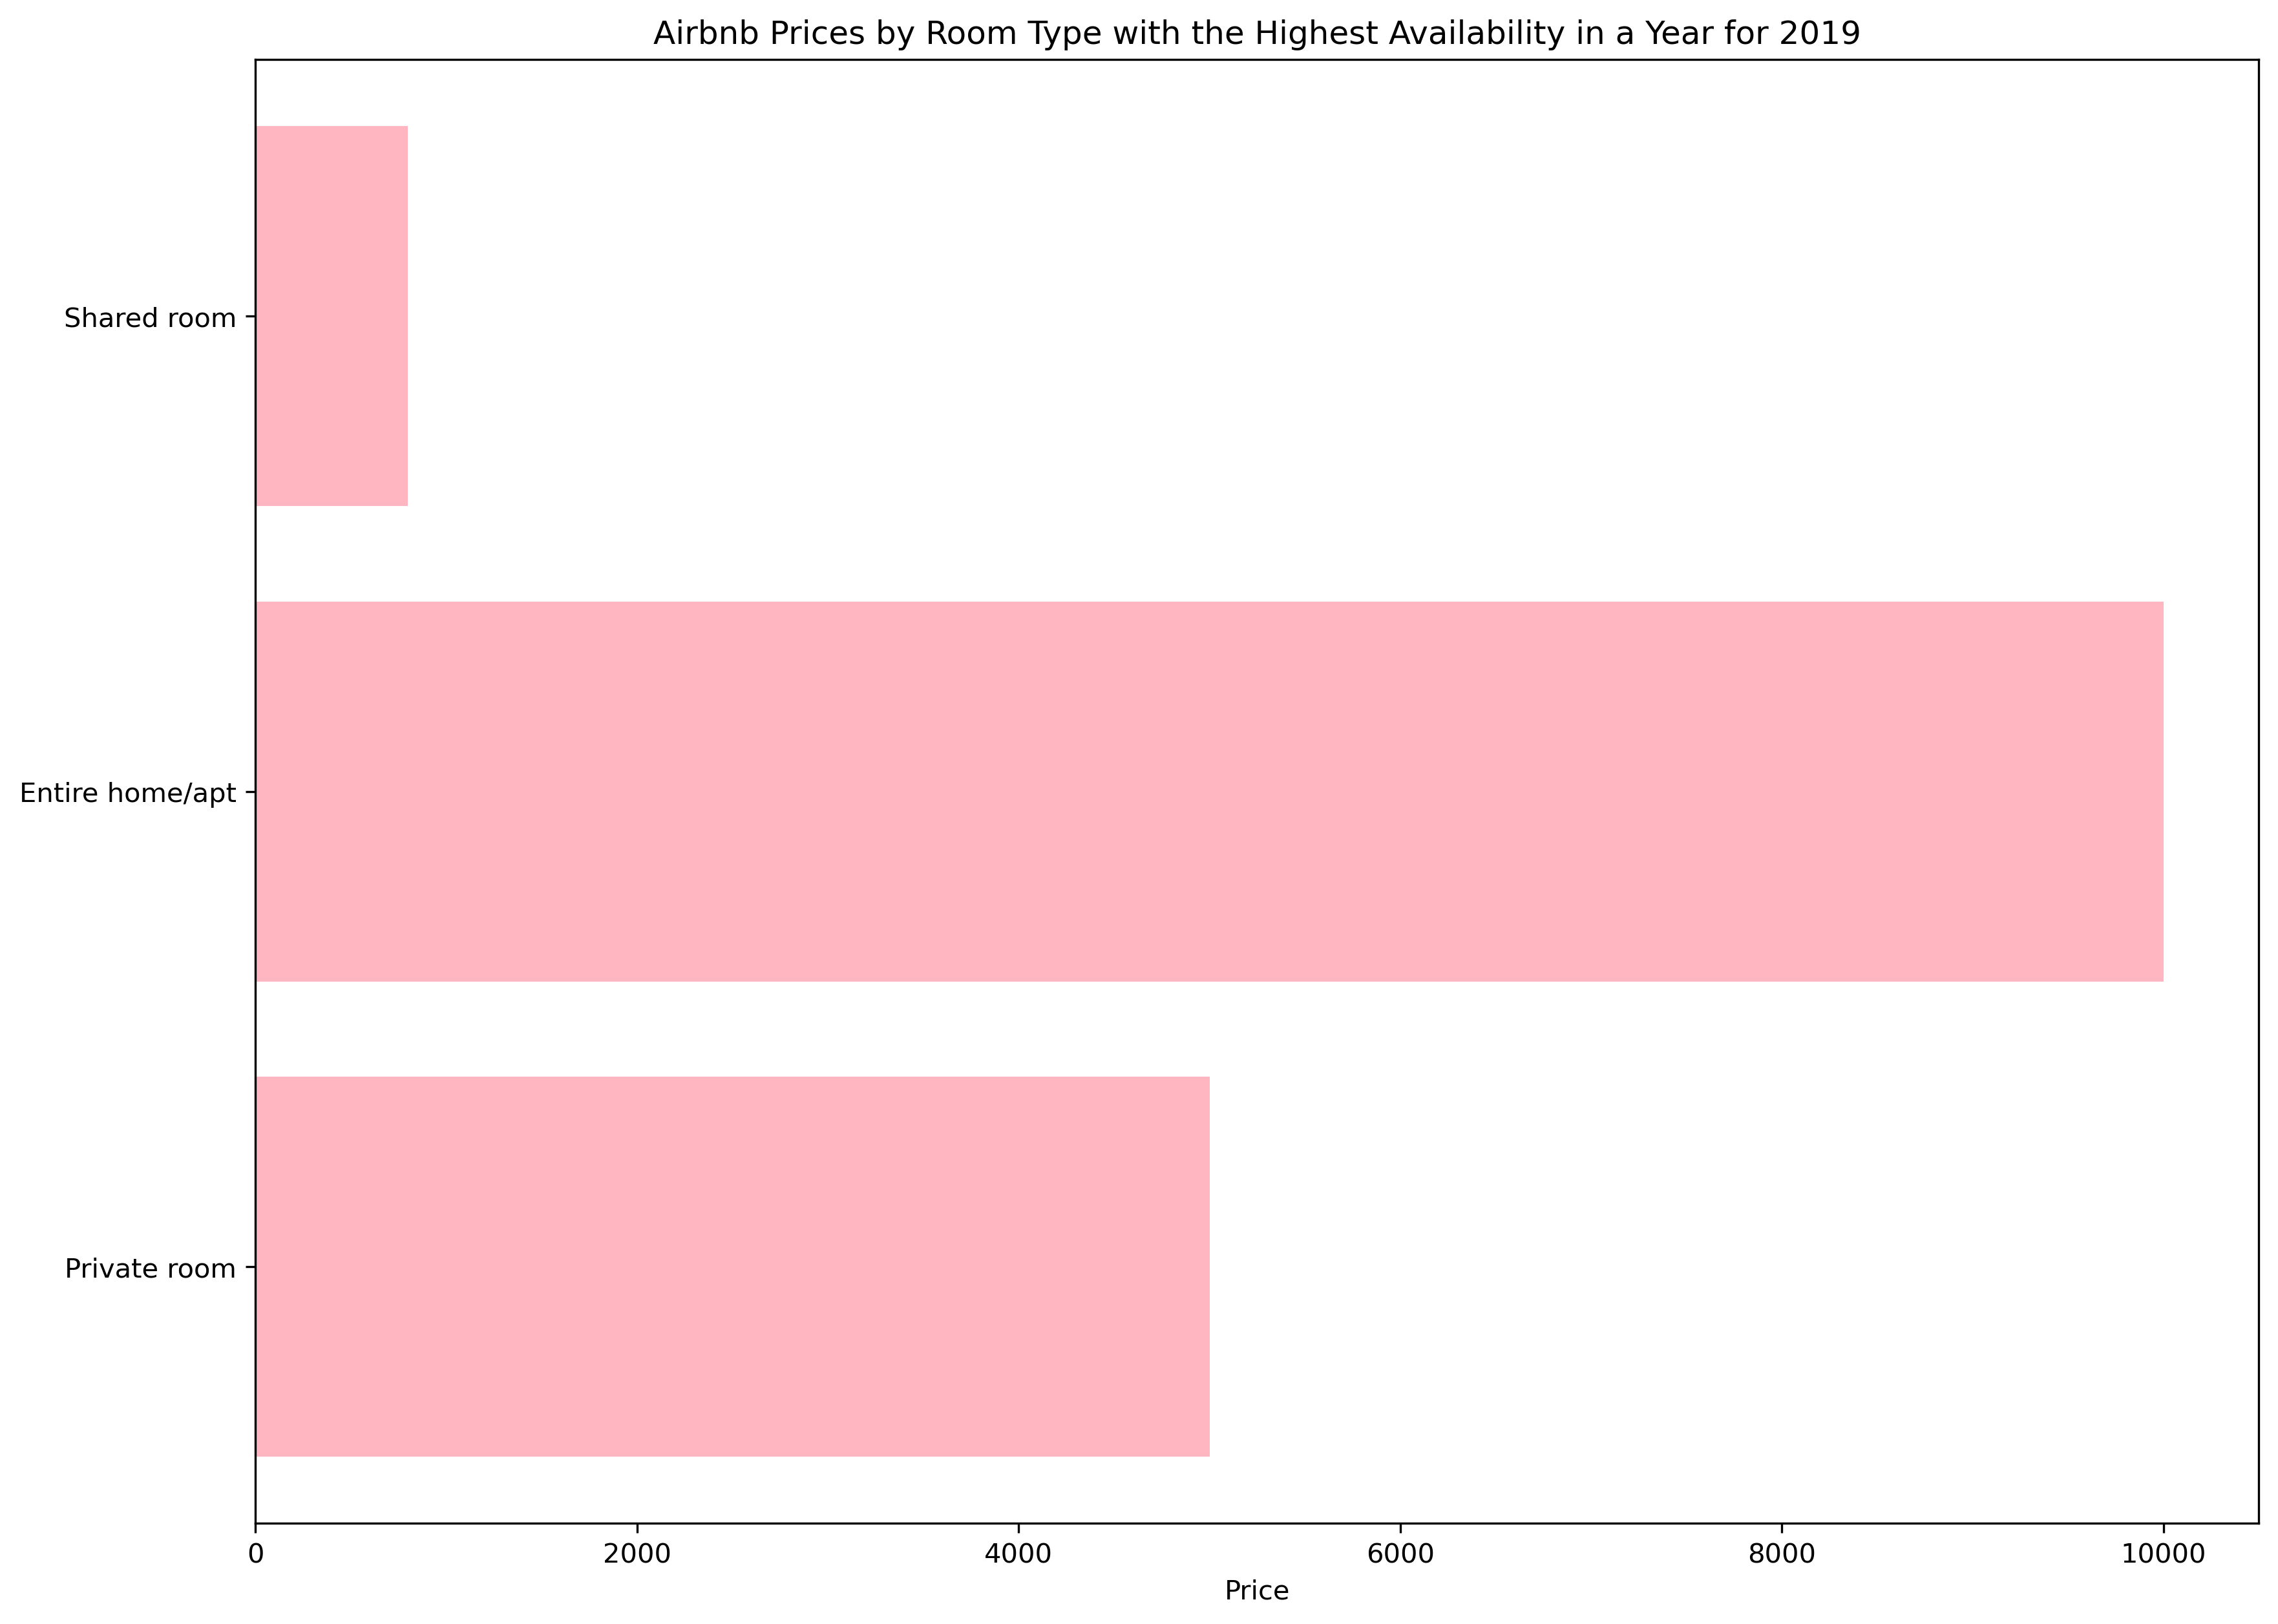

In [17]:
# Barplot with Airbnb Prices by Room Type with the Highest Availability in a Year
figure_2 = plt.figure(figsize=(20 / 1.5, 15 / 1.5), dpi=300)
Highest_availability = data[data["availability_365"] >= 250]
plt.barh(
    Highest_availability["room_type"], Highest_availability["price"], color="lightpink"
)
plt.title("Airbnb Prices by Room Type with the Highest Availability in a Year for 2019")
plt.xlabel("Price")
plt.show()

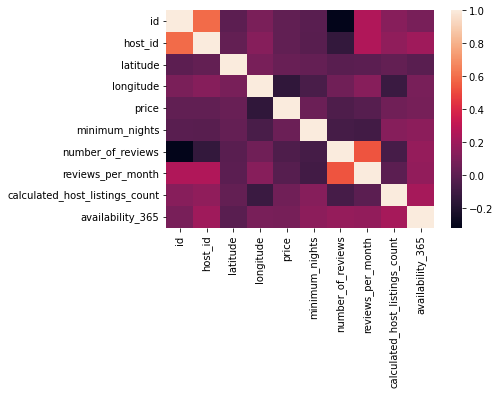

In [18]:
# A heatmap to find any potential correlation among variables
data.corr()
heatmap = sns.heatmap(data.corr())

# The values that are positively correlated are mapped to the lighter shade, whereas the values that are negatively correlated are mapped to the darker shade.

Text(0.5, 0, 'Neighbourhood Group')

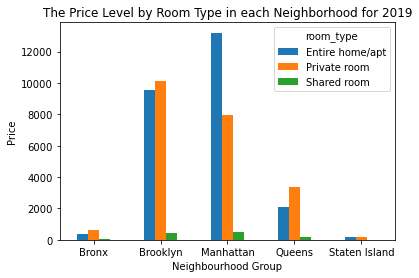

In [19]:
# Barplot for The Price Level by Room Type in each neighborhood
neighborhood_counts = (
    data.groupby(["neighbourhood_group", "room_type"])["neighbourhood_group"]
    .size()
    .unstack(fill_value=0)
)
room_type = neighborhood_counts.plot.bar(rot=0)
plt.title("The Price Level by Room Type in each Neighborhood for 2019")
plt.ylabel("Price")
plt.xlabel("Neighbourhood Group")

In [20]:
# Top 10 neighbourhoods by calculated host listing count

neighborhood_top10 = (
    data.groupby(["neighbourhood"])["calculated_host_listings_count"]
    .count()
    .to_frame()
    .sort_values(["calculated_host_listings_count"], ascending=[False])
    .head(10)
)
neighborhood_top10

,calculated_host_listings_count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


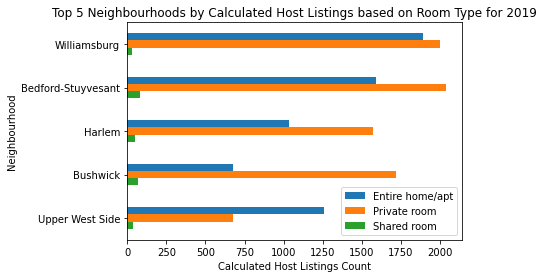

In [21]:
# Top 5 Neighbourhoods by Calculated Host Listings based on Room Type
neighborhood_top5 = neighborhood_top10.head(5)
neighborhood_top5_2 = (
    data.groupby(["neighbourhood", "room_type"])["room_type"]
    .size()
    .unstack(fill_value=20)
)
neighborhood_top5_count = pd.merge(
    neighborhood_top5, neighborhood_top5_2, how="left", on=["neighbourhood"]
)
neighborhood_top5_count = neighborhood_top5_count[
    ["Entire home/apt", "Private room", "Shared room"]
]
neighborhood = neighborhood_top5_count.plot(kind="barh")
plt.title(
    "Top 5 Neighbourhoods by Calculated Host Listings based on Room Type for 2019"
)
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Neighbourhood")
ax = plt.gca()
ax.invert_yaxis()

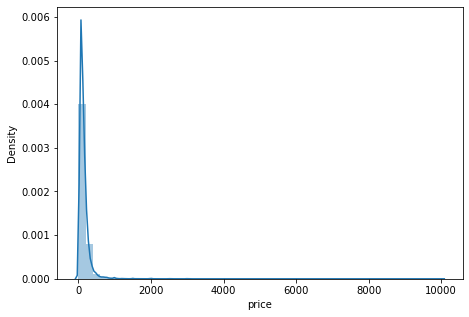

Highest allowed 873.1831964283906
Lowest allowed -567.7418220547329


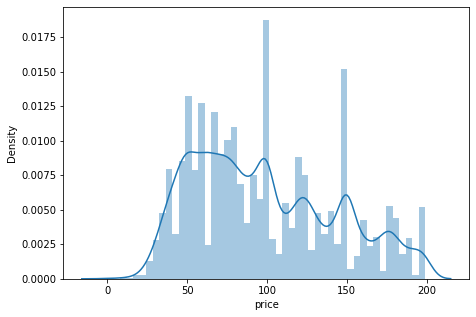

In [22]:
# Removing outliers in the variable "Price"
# Trimming the outliers
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(data["price"])
plt.show()
print("Highest allowed", data["price"].mean() + 3 * data["price"].std())
print("Lowest allowed", data["price"].mean() - 3 * data["price"].std())
# Note that the average Airbnb price per night in NYC is $143
new_data = data[(data["price"] < 200)]
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(new_data["price"])
plt.show()

Text(0, 0.5, 'Price')

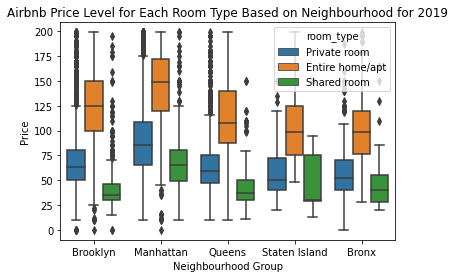

In [23]:
# Boxplot for Airbnb Price Level for Each Room Type Based on Neighbourhood
Boxplot = sns.boxplot(
    y="price", data=new_data, x="neighbourhood_group", hue="room_type"
)
plt.title("Airbnb Price Level for Each Room Type Based on Neighbourhood for 2019")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

In [24]:
# Save plots to artifacts
Highest_availability = figure_1.get_figure()
Highest_availability.savefig("../artifacts/Highest_availability.png")
Lowest_availability = figure_2.get_figure()
Lowest_availability.savefig("../artifacts/Lowest_availability.png")
heatmap = heatmap.get_figure()
heatmap.savefig("../artifacts/heatmap.png")
room_type = room_type.get_figure()
room_type.savefig("../artifacts/neighborhood_top5_count.png")
Boxplot = Boxplot.get_figure()
Boxplot.savefig("../artifacts/Boxplot.png")
neighborhood
neighborhood = neighborhood.get_figure()
neighborhood.savefig("../artifacts/neighborhood.png")